In [17]:
import sys
sys.path.append('/mnt/labshare/Programs/python/HelperFunctions/')
from plottingFunctions import *
from scipy.linalg import expm
from scipy.constants import h, hbar

init_notebook_mode(connected=True)

from IPython.display import Image

# Driven Qubit Model

Based on Robert's Matlab code.

Each pulse (treated as delta function) rotates qubit by angle

$$
δθ=C_c Φ_0 \sqrt{\frac{2ω_{10}}{\hbar C}}
$$

Evolution is defined by a chain of SFQ interactions and free evolutions.

$$
... U_{free} * U_{sfq} * U_{free} * U_{sfq} \left| \Psi_0 \right>
$$

In [2]:
w10 = 2*np.pi*5e9
w21 = 2*np.pi*4.8e9

c = 1e-13 # 100fF Qubit Capacitance
cc = 1e-16 # 100aF Coupling Capacitance

t0 = 2*np.pi/w10

g = np.array([1,0,0]) # Ground state

p = 1/np.sqrt(2) * np.array([1,1,0])
pi = 1/np.sqrt(2) * np.array([1,1j,0])

m = 1/np.sqrt(2) * np.array([1,-1,0])
mi = 1/np.sqrt(2) * np.array([1,-1j,0])

e = np.array([0, 1, 0]) # Excited state

proj2 = np.array([0, 0, 1]).T
proj1 = np.array([0, 1, 0]).T

a = np.array([[0, 1, 0],[0, 0, np.sqrt(2)],[0, 0, 0]]);

adag = a.T

ufree = np.array([
    [1, 0, 0],
    [0, np.exp(-1j*w10*t0), 0],
    [0, 0, np.exp(-1j*(w10 + w21)*t0)]
])

In [3]:
num = np.arange(10, 500, 1)

p2 = {
    'g': [],
    'e': [],
    'm': [],
    'mi': [],
    'p': [],
    'pi': [],
    'av': []
}
p1 = []
F = {
    'g': [],
    'e': [],
    'm': [],
    'mi': [],
    'p': [],
    'pi': [],
    'av': [],
}

ind = []
infidelity = np.ones((1, len(num)))
infidelity2 = np.ones((1, len(num)))

for n in num:
    psi_g=g
    psi_e=e
    psi_m=m
    psi_mi=mi
    psi_p=p
    psi_pi=pi
    
    phi = np.pi/2/n
    
    usfq = expm(phi/2*(a - adag))
    u = np.identity(3)
    
    for i in range(n):
        psi_g = np.dot(usfq, psi_g)
        psi_e = np.dot(usfq, psi_e)
        psi_m = np.dot(usfq, psi_m)
        psi_mi = np.dot(usfq, psi_mi)
        psi_p = np.dot(usfq, psi_p)
        psi_pi = np.dot(usfq, psi_pi)
        
        u = usfq * u
        
        if i < n:
            psi_g = np.dot(ufree, psi_g)
            psi_e = np.dot(ufree, psi_e)
            psi_m = np.dot(ufree, psi_m)
            psi_mi = np.dot(ufree, psi_mi)
            psi_p = np.dot(ufree, psi_p)
            psi_pi = np.dot(ufree, psi_pi)

            u = ufree * u     

        
    F['g'].append(np.abs(np.dot(m, psi_g))**2)
    F['e'].append(np.abs(np.dot(p, psi_e))**2)
    F['m'].append(np.abs(np.dot(e, psi_m))**2)
    F['mi'].append(np.abs(np.dot(mi, psi_mi))**2)
    F['p'].append(np.abs(np.dot(g, psi_p))**2)
    F['pi'].append(np.abs(np.dot(pi, psi_pi))**2)
    F['av'].append((F['g'][-1] + F['e'][-1] +F['m'][-1] +F['mi'][-1] +F['p'][-1] +F['pi'][-1])/6.)

    p2['g'].append(np.abs(np.dot(proj2, psi_g))**2)
    p2['e'].append(np.abs(np.dot(proj2, psi_e))**2)
    p2['m'].append(np.abs(np.dot(proj2, psi_m))**2)
    p2['mi'].append(np.abs(np.dot(proj2, psi_mi))**2)
    p2['p'].append(np.abs(np.dot(proj2, psi_p))**2)
    p2['pi'].append(np.abs(np.dot(proj2, psi_pi))**2)
    p2['av'].append((p2['g'][-1] + p2['e'][-1] +p2['m'][-1] +p2['mi'][-1] +p2['p'][-1] +p2['pi'][-1])/6.)       

In [4]:
traces = []

for i in ['g', 'e']:
    l, tr = LinePlot(x=num, y=p2[i], show=False);
    tr.update(name=i)
    traces.append(tr)

l, tr = LinePlot(x=num, y=np.ones(len(F['av'])) - F['av'], layoutOpts={'xaxis': {'type': 'log'}, 'yaxis': {'type': 'log'}}, show=False);
tr.update(name='Fav')
traces.append(tr)
iplot(go.Figure(data=traces, layout=l))

## Rabi Oscillations

Adding an $\left|f\right>$ state

In [5]:
w10 = 2*np.pi*5e9
w21 = 2*np.pi*4.8e9

c = 1e-13 # 100fF Qubit Capacitance
cc = 1e-16 # 100aF Coupling Capacitance

t0 = 2*np.pi/w10

g = np.array([1,0,0]) # Ground state

p = 1/np.sqrt(2) * np.array([1,1,0])
pi = 1/np.sqrt(2) * np.array([1,1j,0])

m = 1/np.sqrt(2) * np.array([1,-1,0])
mi = 1/np.sqrt(2) * np.array([1,-1j,0])

ex = np.array([0, 1, 0]) # Excited state

f = np.array([0, 0, 1]) # Two state

proj2 = np.array([0, 0, 1]).T
proj1 = np.array([0, 1, 0]).T

a = np.array([
    [0, 1, 0],
    [0, 0, np.sqrt(2)],
    [0, 0, 0]]);

adag = a.T

ufree = np.array([
    [1, 0, 0],
    [0, np.exp(-1j*w10*t0), 0],
    [0, 0, np.exp(-1j*(w10 + w21)*t0)]
])

In [6]:
def RabiSim(rabifreq=100):

    num = np.arange(1, 10*rabifreq, 1) # Number of SFQ pulses

    p1 = {
        'g': [],
        'e': [],
        'f': [],
        'm': [],
        'mi': [],
        'p': [],
        'pi': [],
        'av': []
    }
    p2 = {
        'g': [],
        'e': [],
        'f': [],
        'm': [],
        'mi': [],
        'p': [],
        'pi': [],
        'av': []
    }
    F = {
        'g': [],
        'e': [],
        'f': [],
        'm': [],
        'mi': [],
        'p': [],
        'pi': [],
        'av': [],
    }

    ind = []
    infidelity = np.ones((1, len(num)))
    infidelity2 = np.ones((1, len(num)))



    for n in num:
        psi_g=g
        psi_e=ex
        psi_f=f
        psi_m=m
        psi_mi=mi
        psi_p=p
        psi_pi=pi

        phi = np.pi/2/rabifreq

        usfq = expm(phi/2*(a - adag))
        u = np.identity(3)

        for i in range(n):
            psi_g = np.dot(usfq, psi_g)
            psi_e = np.dot(usfq, psi_e)
            psi_f = np.dot(usfq, psi_f)
            psi_m = np.dot(usfq, psi_m)
            psi_mi = np.dot(usfq, psi_mi)
            psi_p = np.dot(usfq, psi_p)
            psi_pi = np.dot(usfq, psi_pi)

            u = usfq * u

            if i < n:
                psi_g = np.dot(ufree, psi_g)
                psi_e = np.dot(ufree, psi_e)
                psi_f = np.dot(ufree, psi_f)
                psi_m = np.dot(ufree, psi_m)
                psi_mi = np.dot(ufree, psi_mi)
                psi_p = np.dot(ufree, psi_p)
                psi_pi = np.dot(ufree, psi_pi)

                u = ufree * u     


        F['g'].append(np.abs(np.dot(m, psi_g))**2)
        F['e'].append(np.abs(np.dot(p, psi_e))**2)
        F['f'].append(np.abs(np.dot(p, psi_f))**2)
        F['m'].append(np.abs(np.dot(e, psi_m))**2)
        F['mi'].append(np.abs(np.dot(mi, psi_mi))**2)
        F['p'].append(np.abs(np.dot(g, psi_p))**2)
        F['pi'].append(np.abs(np.dot(pi, psi_pi))**2)
        F['av'].append((F['g'][-1] + F['e'][-1] +F['m'][-1] +F['mi'][-1] +F['p'][-1] +F['pi'][-1])/6.)

        p2['g'].append(np.abs(np.dot(proj2, psi_g))**2)
        p2['e'].append(np.abs(np.dot(proj2, psi_e))**2)
        p2['f'].append(np.abs(np.dot(proj2, psi_f))**2)
        p2['m'].append(np.abs(np.dot(proj2, psi_m))**2)
        p2['mi'].append(np.abs(np.dot(proj2, psi_mi))**2)
        p2['p'].append(np.abs(np.dot(proj2, psi_p))**2)
        p2['pi'].append(np.abs(np.dot(proj2, psi_pi))**2)
        p2['av'].append((p2['g'][-1] + p2['e'][-1] +p2['m'][-1] +p2['mi'][-1] +p2['p'][-1] +p2['pi'][-1])/6.)

        p1['g'].append(np.abs(np.dot(proj1, psi_g))**2)
        p1['e'].append(np.abs(np.dot(proj1, psi_e))**2)
        p1['f'].append(np.abs(np.dot(proj1, psi_f))**2)
        p1['m'].append(np.abs(np.dot(proj1, psi_m))**2)
        p1['mi'].append(np.abs(np.dot(proj1, psi_mi))**2)
        p1['p'].append(np.abs(np.dot(proj1, psi_p))**2)
        p1['pi'].append(np.abs(np.dot(proj1, psi_pi))**2)
        p1['av'].append((p1['g'][-1] + p1['e'][-1] +p1['m'][-1] +p1['mi'][-1] +p1['p'][-1] +p1['pi'][-1])/6.) 
        
    traces = []

    for i in ['g', 'e', 'f']:
        l, tr = LinePlot("Rabi Oscillations assuming {} pulse pi/2 pulse, f01 = 5GHz, anharmonicity = 200 MHz".format(rabifreq), 
                         x=num, y=p1[i], layoutOpts={'xaxis': {'title': 'Pulse Number'}, 'yaxis': {'title': 'Occupation'}},show=False);
        tr.update(name=i)
        traces.append(tr)

    iplot(go.Figure(data=traces, layout=l))
    return p1

In [7]:
results = []
for n in [10, 25, 50, 100]:
    results.append(RabiSim(n))

## Convert to Capacitance

From
$$
δθ=C_c Φ_0 \sqrt{\frac{2ω_{10}}{\hbar C}}
$$

Can convert number of pulses per pi pulse to a capacitance:

$$
\frac{\pi}{2 n} = C_c Φ_0 \sqrt{\frac{2ω_{10}}{\hbar C}}
$$

$$
C_c = \frac{\pi}{2 Φ_0 n}\sqrt{\frac{\hbar C}{2ω_{10}}}
$$



In [11]:
phi0 = h/(2*1.602176e-19)

cc = lambda n: np.pi/(2 * phi0 * n) * np.sqrt(hbar*c/(2*w10))

In [12]:
n = np.linspace(10, 150, 101)

LinePlot("SFQ Coupling Capacitance needed vs. Number of pulses for pi/2 pulse",
        x = n,
        y = cc(n),
        layoutOpts={'xaxis': {'title': 'Number of pulses per pi/2 pulse'}, 
                    'yaxis': {'title': 'Cc'}});

Given a coupling capacitance of 300aF, puts us at around 32 pulses per pi/2 pulse.

In [14]:
RabiSim(32);

It seems like leakage would be a problem with this high of a coupling capacitance, but I don't see it being the dominant cause of the weird Rabis we were seeing.

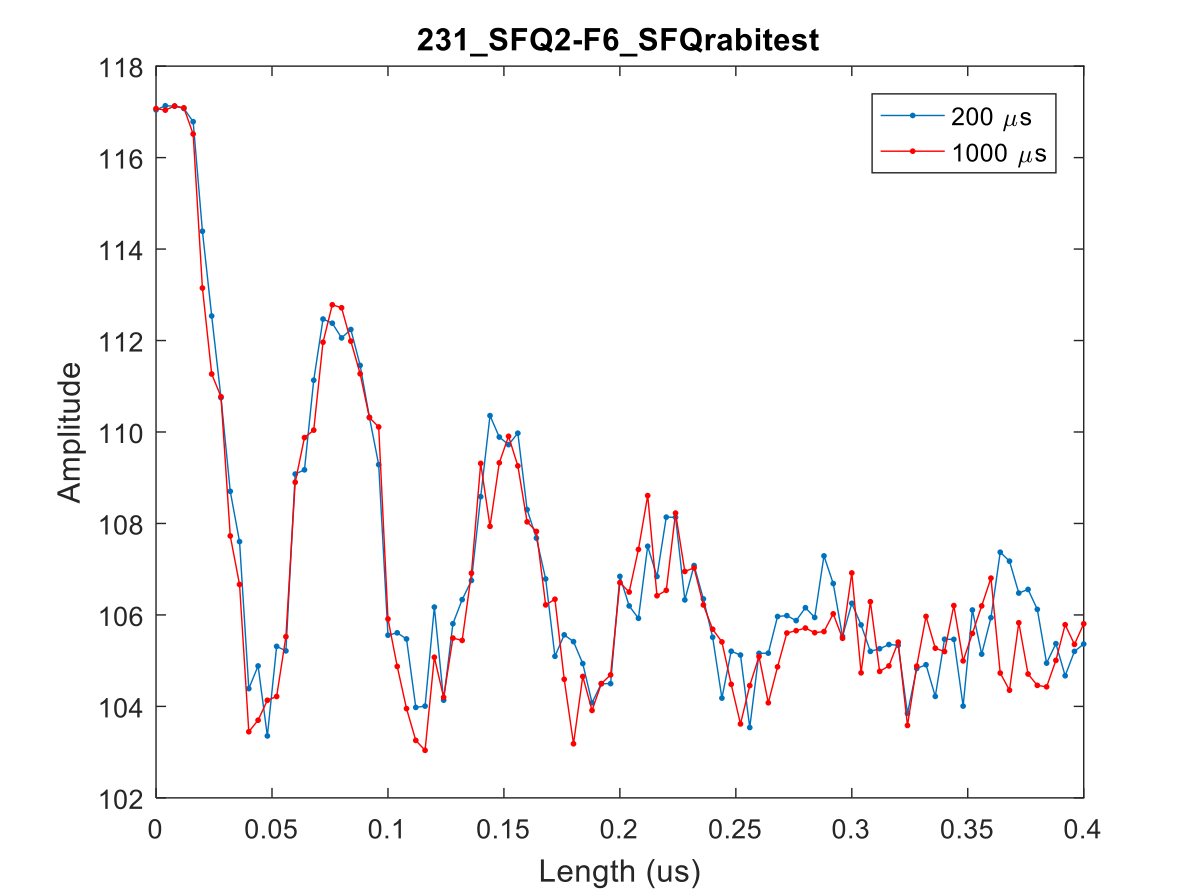

In [16]:
Image('/mnt/labshare/Experiments/DR2/Data/SFQ2-F6/WeirdRabi.png')